- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

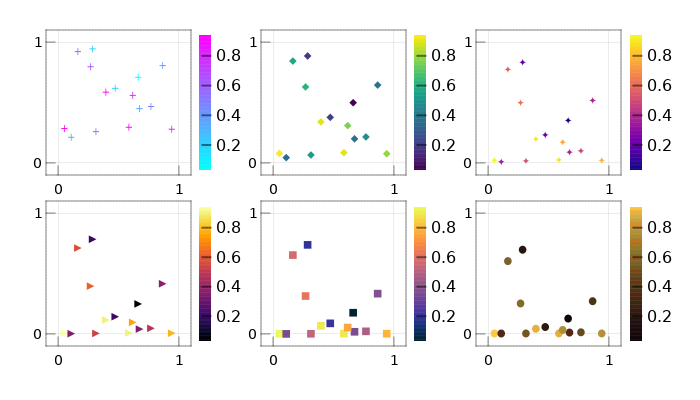

In [1]:
using CairoMakie, Random
include("makieTheme1.jl") # don't forget to include the theme. 

Random.seed!(123)
n = 15
x, y, color = rand(n), rand(n), rand(n)
cmaps = [:cool, :viridis, :plasma, :inferno, :thermal,
    :leonardo, :winter, :spring, :ice]
markers = [:+, :diamond, :star4, :rtriangle, :rect,
    :circle, :pentagon, :cross, :star5];

function FigGridScatters()
    fig = Figure(resolution = (700, 400), font =:sans)
    c = 1
    for i in 1:2, j in 1:2:5
        ax = fig[i, j] = Axis(fig, aspect = 1, # aspect = DataAspect(), 
            show_grid = false, xtickalign=1, ytickalign=1)
        pnts = scatter!(x, y.^c, color = color, colormap=cmaps[c], 
            markersize = 10, marker = markers[c], strokewidth=0)
        limits!(ax, -0.1,1.1,-0.1,1.1)
        ax.xticks = [0,1]
        ax.yticks = [0,1]
        ax.xticklabelsize = 14
        ax.yticklabelsize = 14

        cbar = Colorbar(fig, pnts, height = Relative(3.7/4), tickwidth = 2)
        fig[i, j+1] = cbar
        c+=1
    end
    fig
end
fig = FigGridScatters()
#save("/results/FigGridScatters.svg", fig, pt_per_unit = 0.7);
save("./results/FigGridScatters.png", fig, px_per_unit = 2)
fig